In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/data/wadld/")
import os
import cv2
import numpy as np
import torch
import matplotlib
import matplotlib.pyplot as plt
from utils import (
    draw_wad,
    wadreader,
    data_transformation
)
import sklearn.cluster as cluster
import seaborn as sns
from utils.rendering import draw_traversable_space
from utils.wadreader import decode_wad
from utils.io_utils import get_wad_paths
# from ml.feature_extraction import feature_mat

sns.reset_orig()  # get default matplotlib styles back

ddir = "/data/wadld/data/dataset/"
df_filename = "all_wads.pkl"


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/anaconda/envs/py37/lib/python3.7/site-packages/matplotlib/__init__.py:855: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))
/anaconda/envs/py37/lib/python3.7/site-packages/matplotlib/__init__.py:846: MatplotlibDeprecationWarning: 
The text.latex.unicode rcparam was deprecated in Matplotlib 2.2 and will be removed in 3.1.
  "2.2", name=key, obj_type="rcparam", addendum=addendum)


In [58]:
# wad_dir = "9_trio_0"
# filename = "TRIO_9.WAD"
wad_dir = "pagbspd3_0/"
filename = "pagbspd3.wad"
wad_path = os.path.join(ddir, wad_dir, filename)
wad_tensor = draw_wad.image_tensor(wad_path)
vertexes, max_coord_x, max_coord_y, linedefs, ordered_incident_vertices = wadreader.decode_wad(wad_path)
def get_image_array(indices=None):
    return data_transformation.draw_traversable_space([linedefs[i] for i in indices] if indices is not None else linedefs,
                              ordered_incident_vertices,
                              max_coord_x,
                              max_coord_y) / 255


def color_image_array(arr, color=None):
    if color is not None:
#         print("Color array with {}".format(color))
        img = np.reshape(arr, (arr.shape[0], arr.shape[1], 1)) * np.array([color])
    else:
        img = np.reshape(arr, (arr.shape[0], arr.shape[1], 1))
    return img

def get_cmap(n, name='hsv'):
    '''Returns a function that maps each index in 0, 1, ..., n-1 to a distinct 
    RGB color; the keyword argument name must be a standard mpl colormap name.'''
    return plt.cm.get_cmap(name, n)

def plot_subsections(labels):
    plt.figure()
    full_image = get_image_array()
    plt.imshow(full_image)
    plt.title("Complete")
    array = np.zeros((*(full_image.shape), 3)).astype(np.float32)
    uniqs = np.unique(labels)
    clrs = sns.color_palette('husl', n_colors=len(uniqs))  # a list of RGB tuples
    
    for i in uniqs:
        plt.figure()
        new_arr = color_image_array(get_image_array(np.where(labels == i)[0]), color=clrs[i])
#         if ((array > 0) == (new_arr > 0)).sum() > 0:
#             print("Some image positions in cluster {} belong to multiple clusters".format(i))
        array = new_arr + array * (new_arr == 0.0)
        plt.imshow(new_arr)
#     print(array.min(), array.max(), array.shape, clrs[i])
    plt.figure()
    plt.imshow(array)

    

def plot_linedefs(labels, figsize=(10, 10)):
    plt.figure(figsize=figsize)
    full_image = data_transformation.draw_linedefs(linedefs, max_coord_x, max_coord_y, thickness=32)
    plt.imshow(full_image / 255.0)
    plt.title("Complete")
    array = np.zeros_like(full_image)
    uniqs = np.unique(labels)
    clrs = sns.color_palette('husl', n_colors=len(uniqs))  # a list of RGB tuples
    
    for i in uniqs:
        plt.figure(figsize=figsize)
        indices = np.where(labels == i)[0]
        color = tuple((np.array(clrs[i]) * 255).astype(int).tolist())
        new_arr = data_transformation.draw_linedefs(
            [linedefs[i] for i in indices], 
            max_coord_x, 
            max_coord_y, 
            criterion=lambda linedef_tuple: True, # linedef_tuple[1].is_wall(),
            color=color,
            thickness=32,
        )
#         print(np.unique(new_arr))
        array = new_arr + array
        plt.imshow(new_arr / 255.0)
#     print(array.min(), array.max(), array.shape, clrs[i])
    plt.figure()
    plt.imshow(array / 255.0)

num_sides=2813
num_sides=2813


In [60]:
# K Means clusters
N_CLUSTERS = 32
linedefs_pos = np.stack([[linedefs[i][0][0].x, linedefs[i][0][0].y, linedefs[i][0][1].x, linedefs[i][0][1].y] for i in range(len(linedefs))]).astype(np.float32)
km = cluster.KMeans(n_clusters=N_CLUSTERS).fit(linedefs_pos)
labels_ = km.labels_

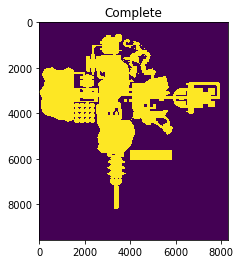

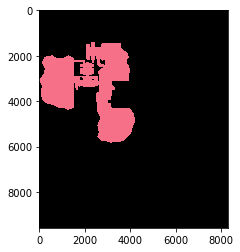

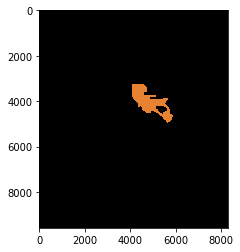

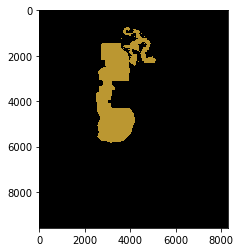

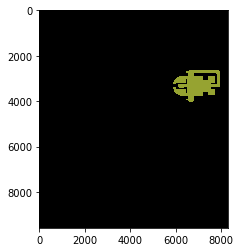

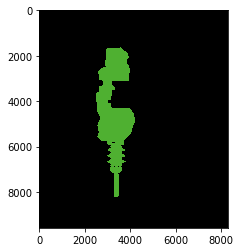

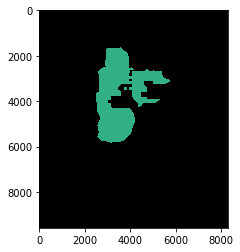

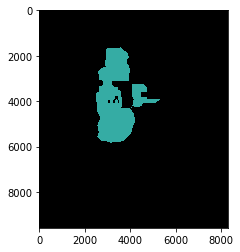

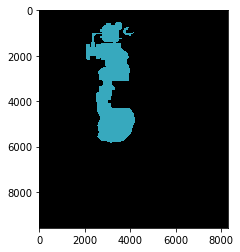

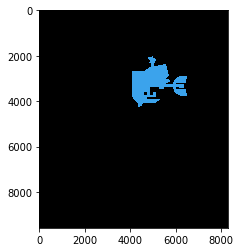

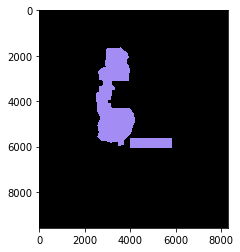

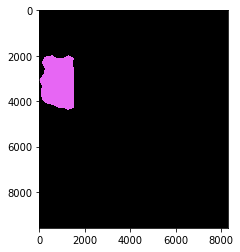

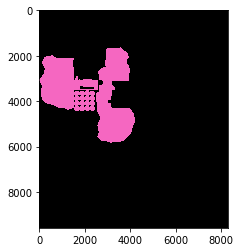

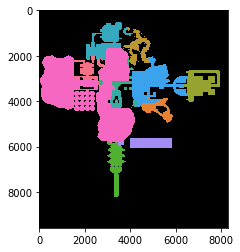

In [9]:
plot_subsections(labels_)

Drew 2813 lines
Drew 89 lines
Drew 55 lines
Drew 92 lines
Drew 62 lines
Drew 98 lines
Drew 139 lines
Drew 74 lines
Drew 88 lines
Drew 96 lines
Drew 76 lines
Drew 54 lines
Drew 66 lines
Drew 82 lines
Drew 75 lines
Drew 70 lines
Drew 93 lines
Drew 73 lines
Drew 115 lines
Drew 101 lines


/anaconda/envs/py35/lib/python3.5/site-packages/matplotlib/pyplot.py:537: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


Drew 89 lines
Drew 136 lines
Drew 93 lines
Drew 62 lines
Drew 97 lines
Drew 108 lines
Drew 84 lines
Drew 61 lines
Drew 152 lines
Drew 82 lines
Drew 73 lines
Drew 124 lines
Drew 54 lines


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


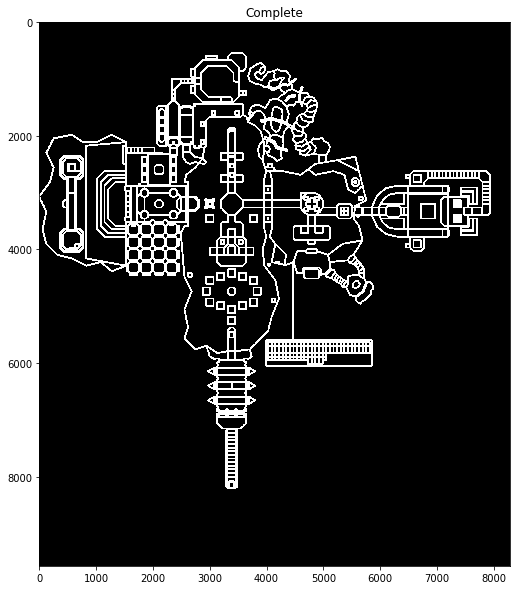

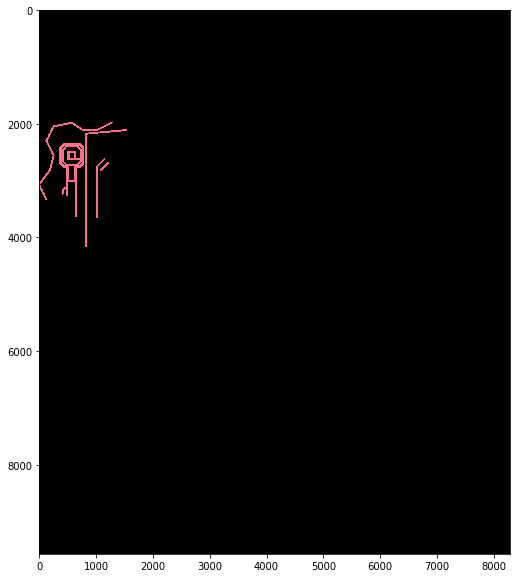

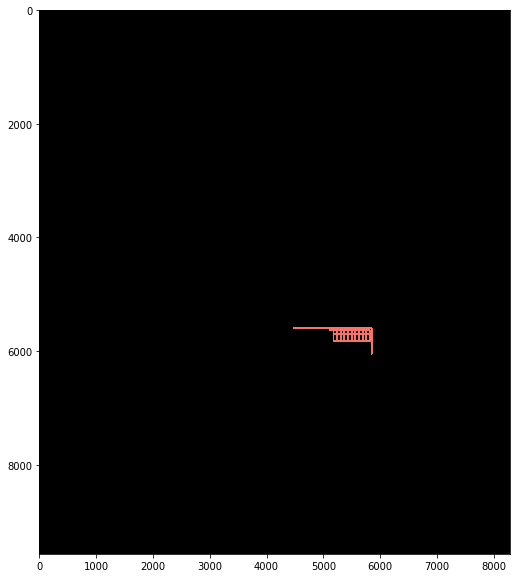

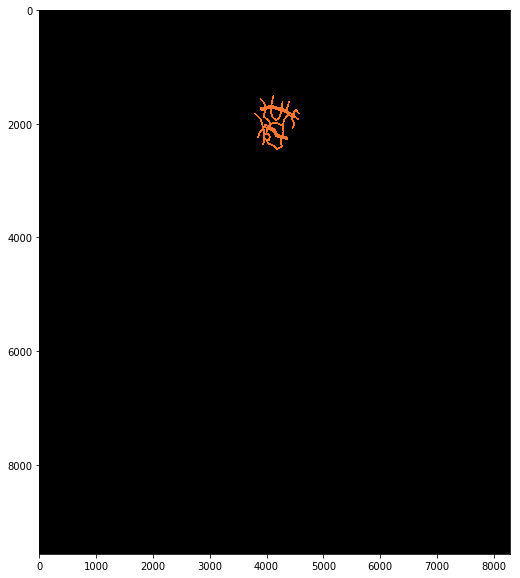

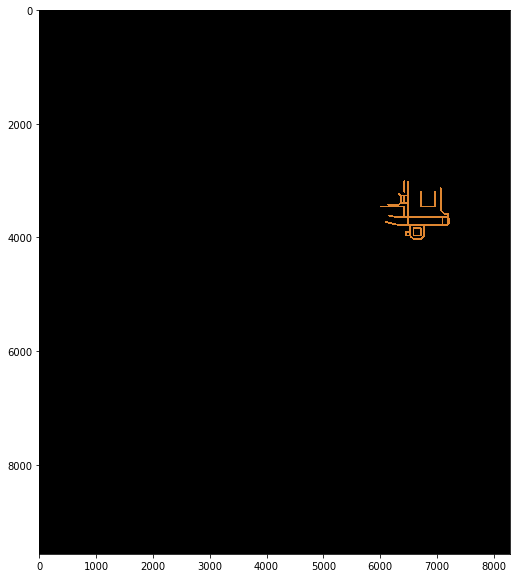

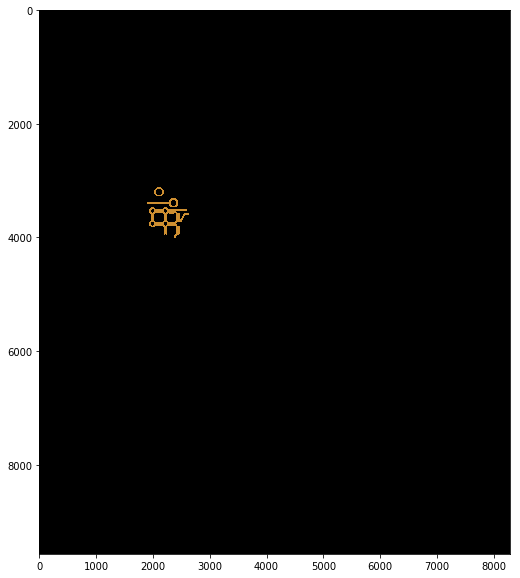

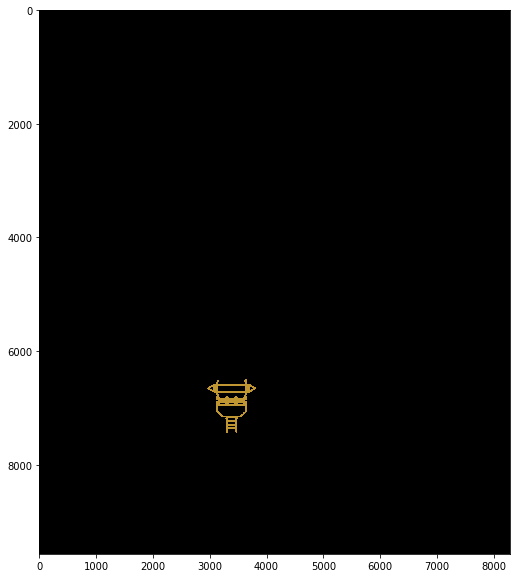

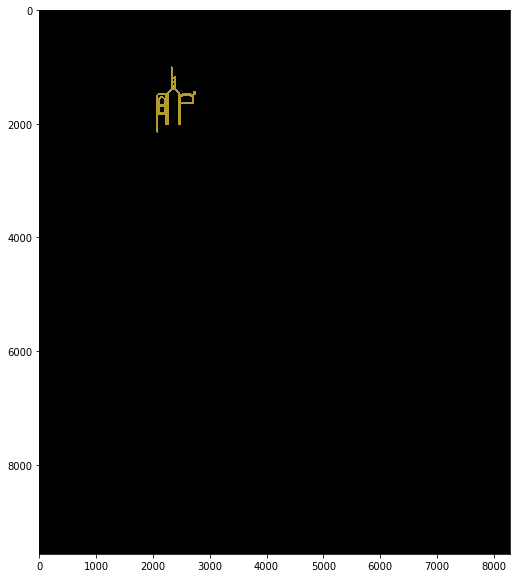

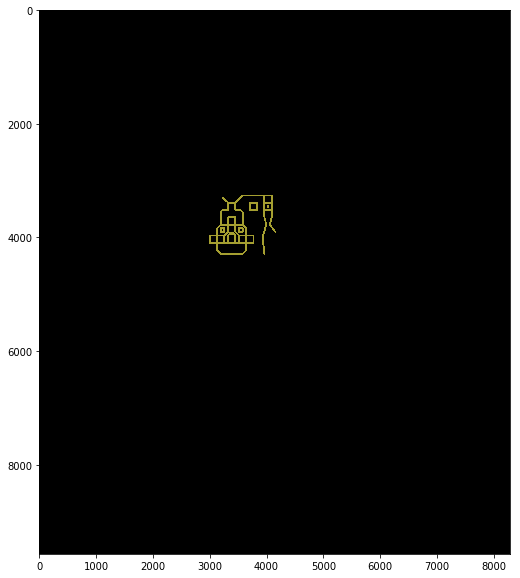

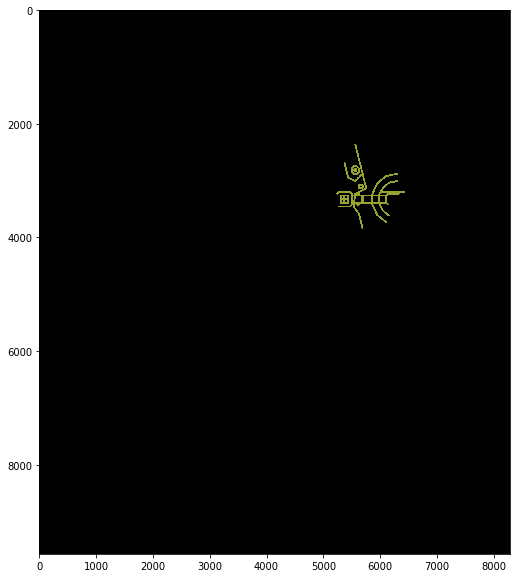

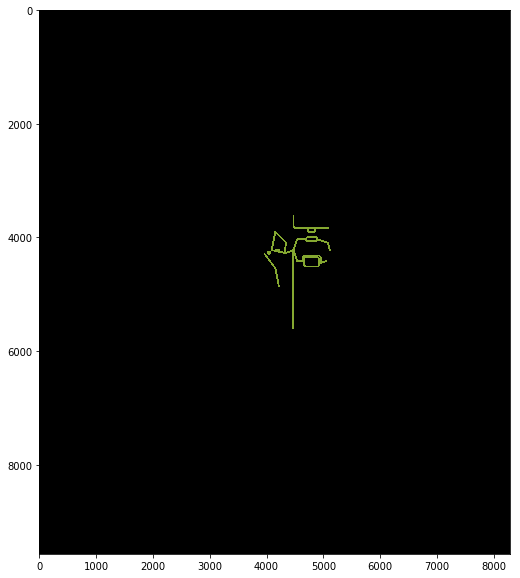

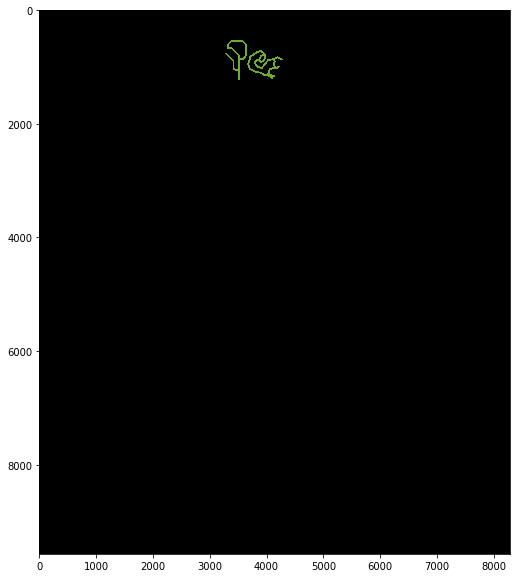

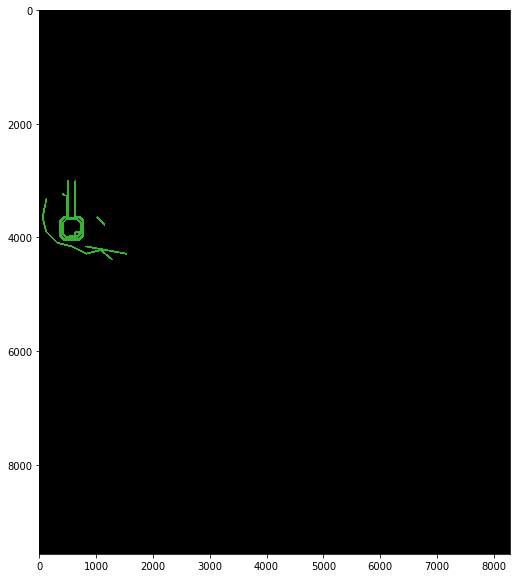

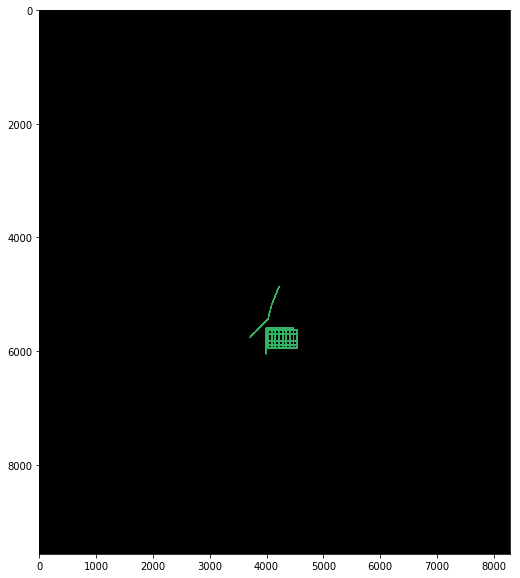

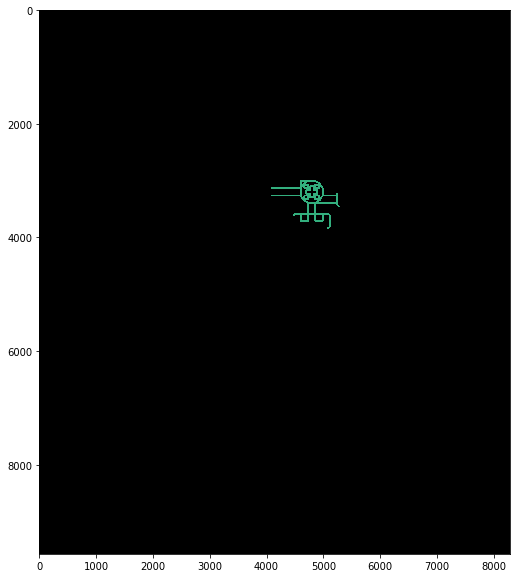

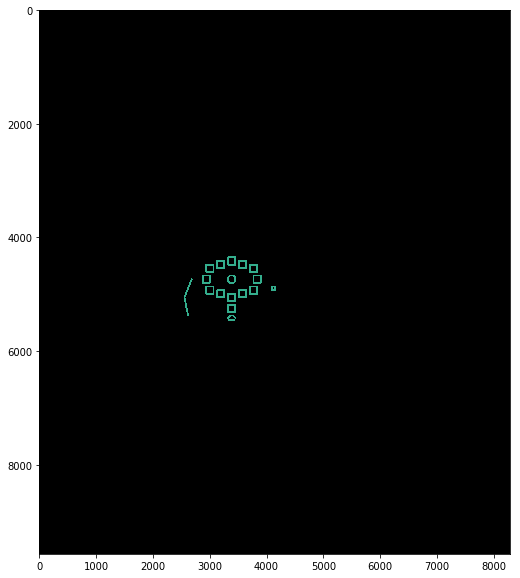

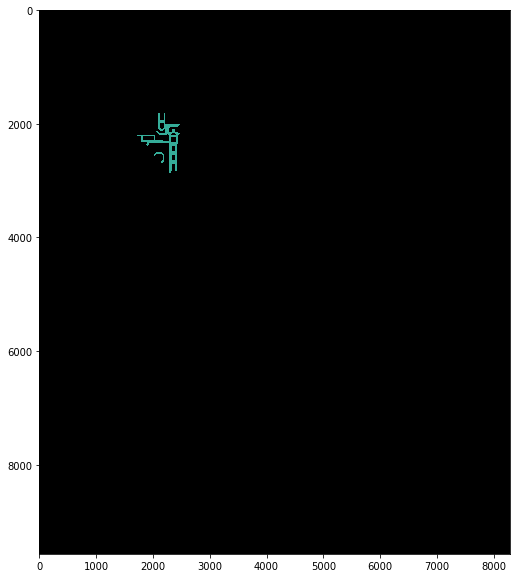

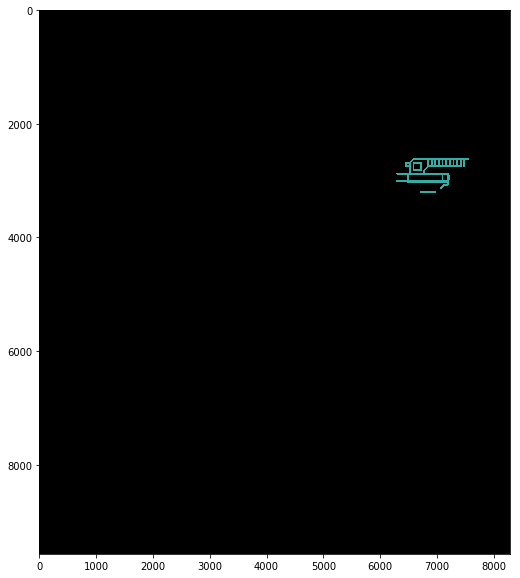

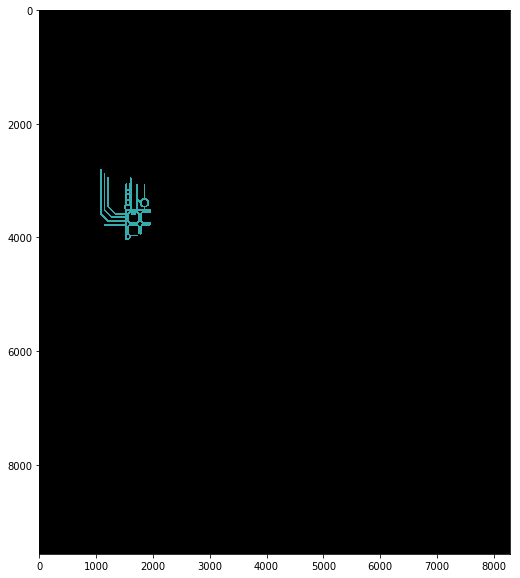

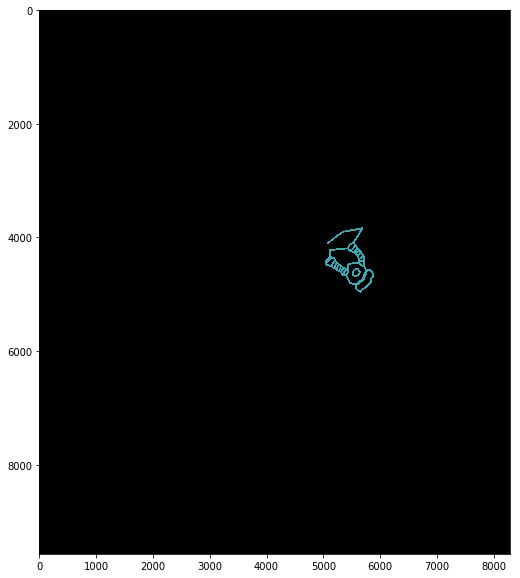

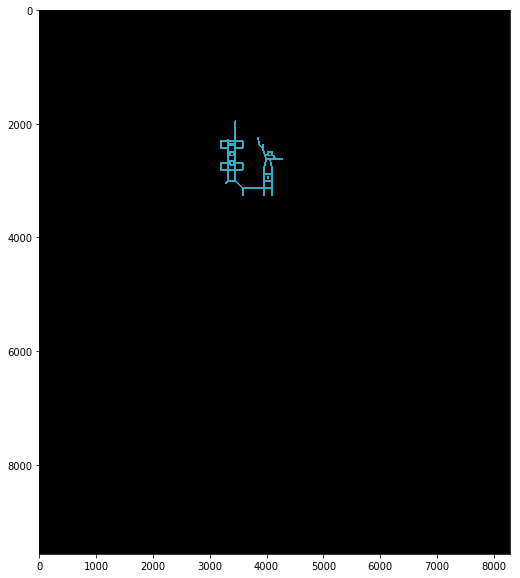

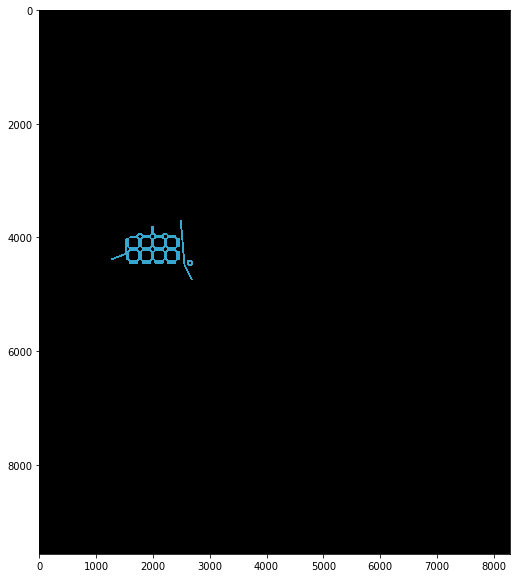

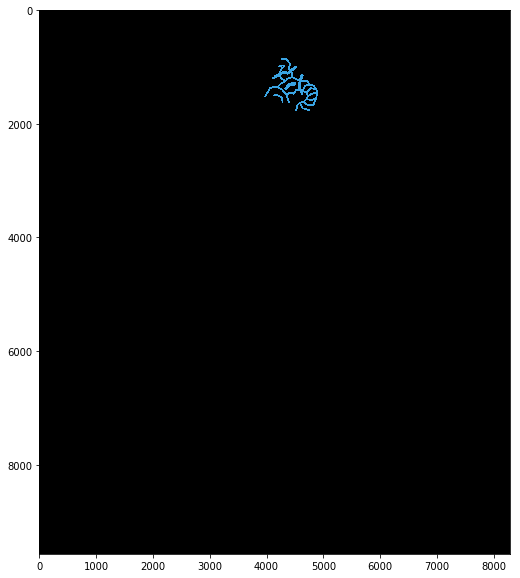

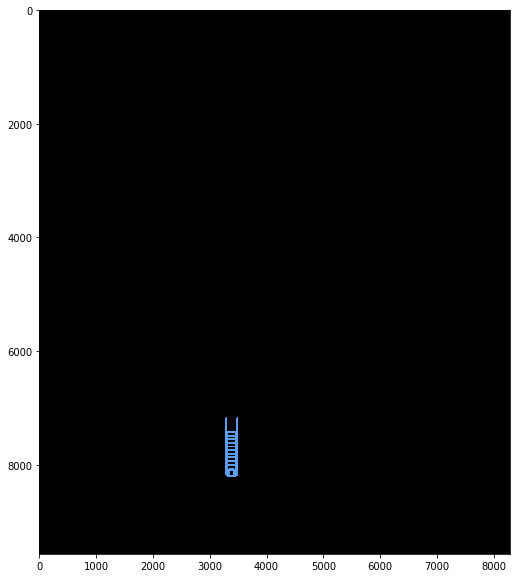

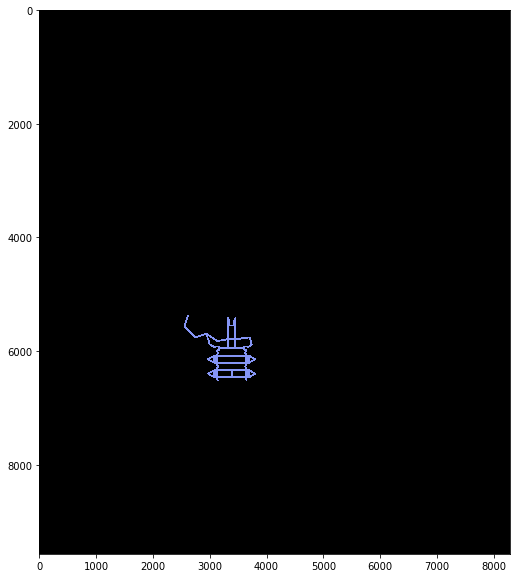

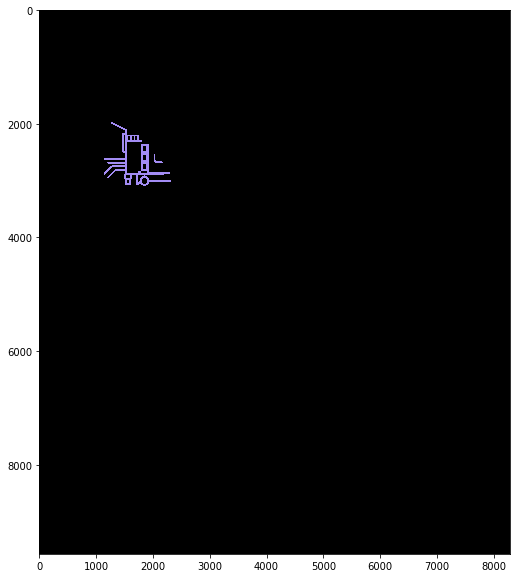

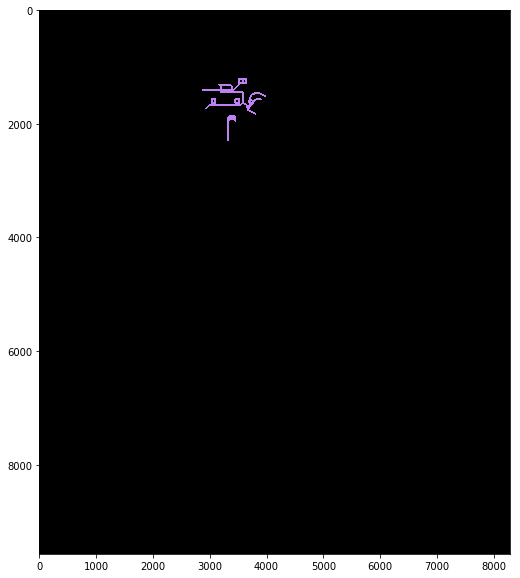

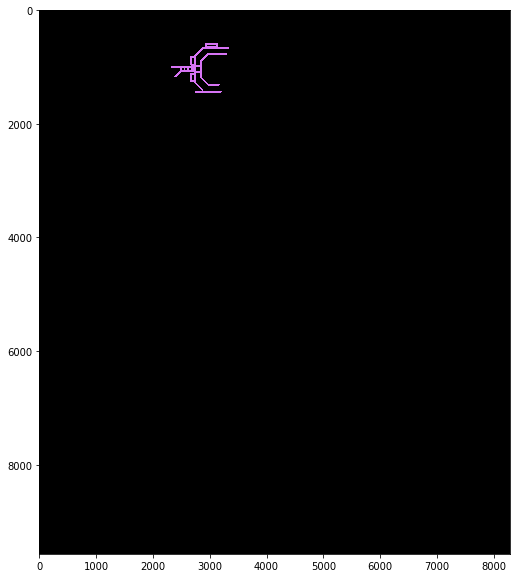

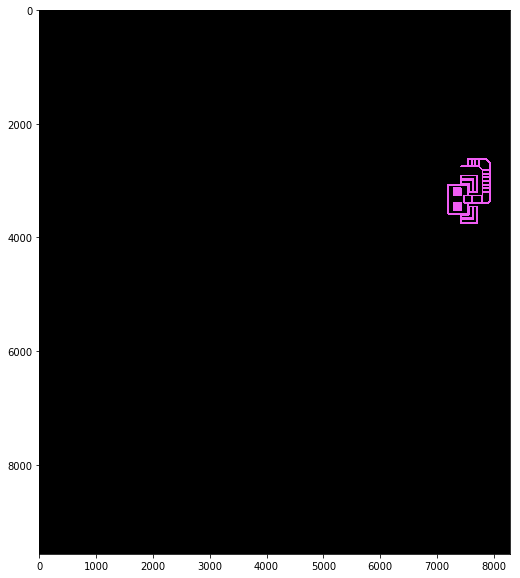

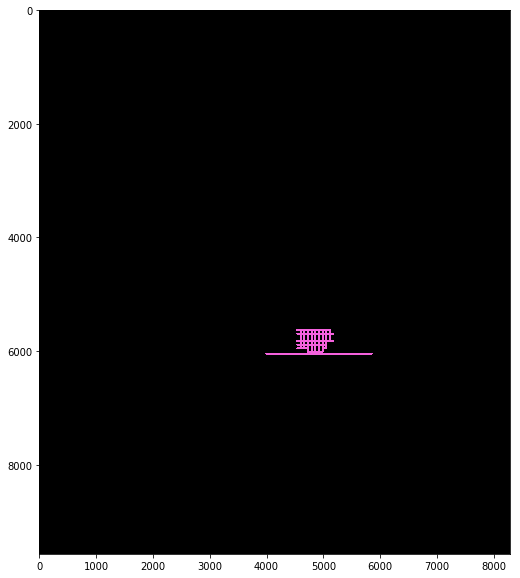

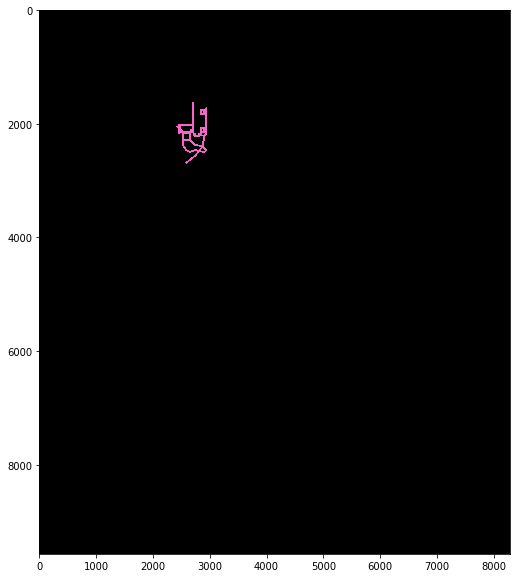

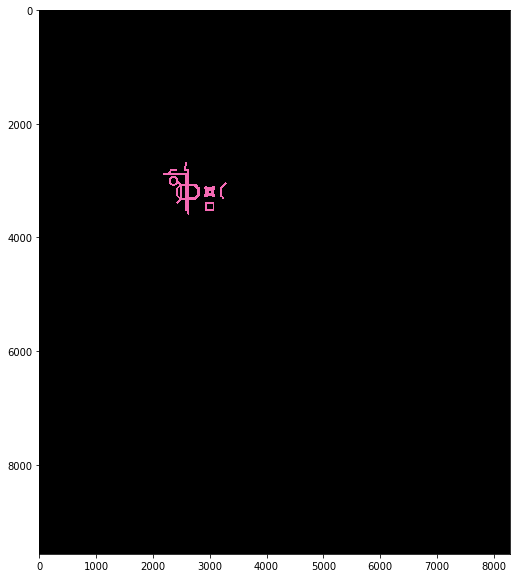

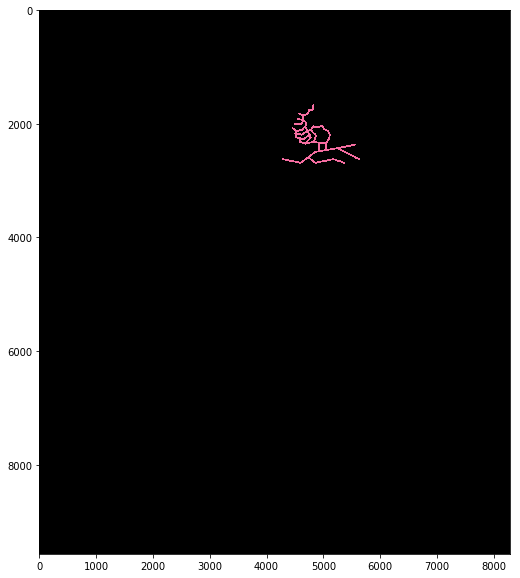

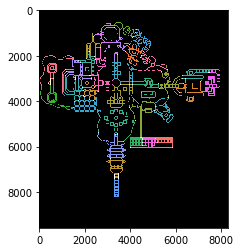

In [61]:
plot_linedefs(labels_)

Drew 1 lines
mcx, mcy: 4736, 4096
5536 3456 5632 3584


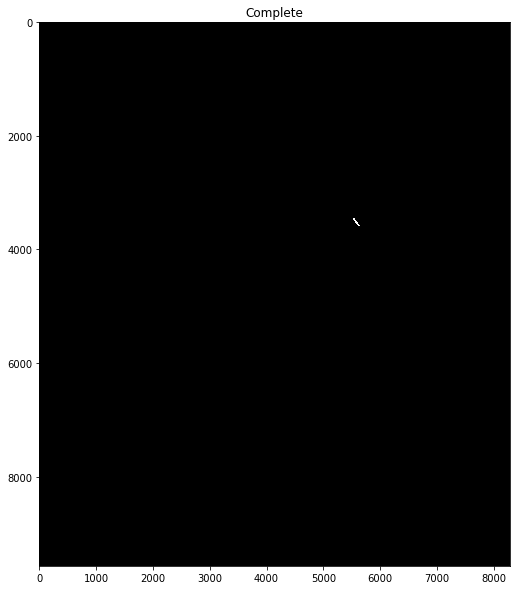

In [55]:
i = 14
plt.figure(figsize=(10, 10))
full_image = data_transformation.draw_linedefs([linedefs[i]], max_coord_x, max_coord_y, criterion=lambda x: True, thickness=32, lineType=4)
plt.imshow(full_image / 255.0)
plt.title("Complete")
print("mcx, mcy: {}, {}".format(max_coord_x, max_coord_y))
print(max_coord_x + linedefs[i][0][0].x, max_coord_y - linedefs[i][0][0].y, max_coord_x + linedefs[i][0][1].x, max_coord_y - linedefs[i][0][1].y)

Text(0.5,1,'Complete')

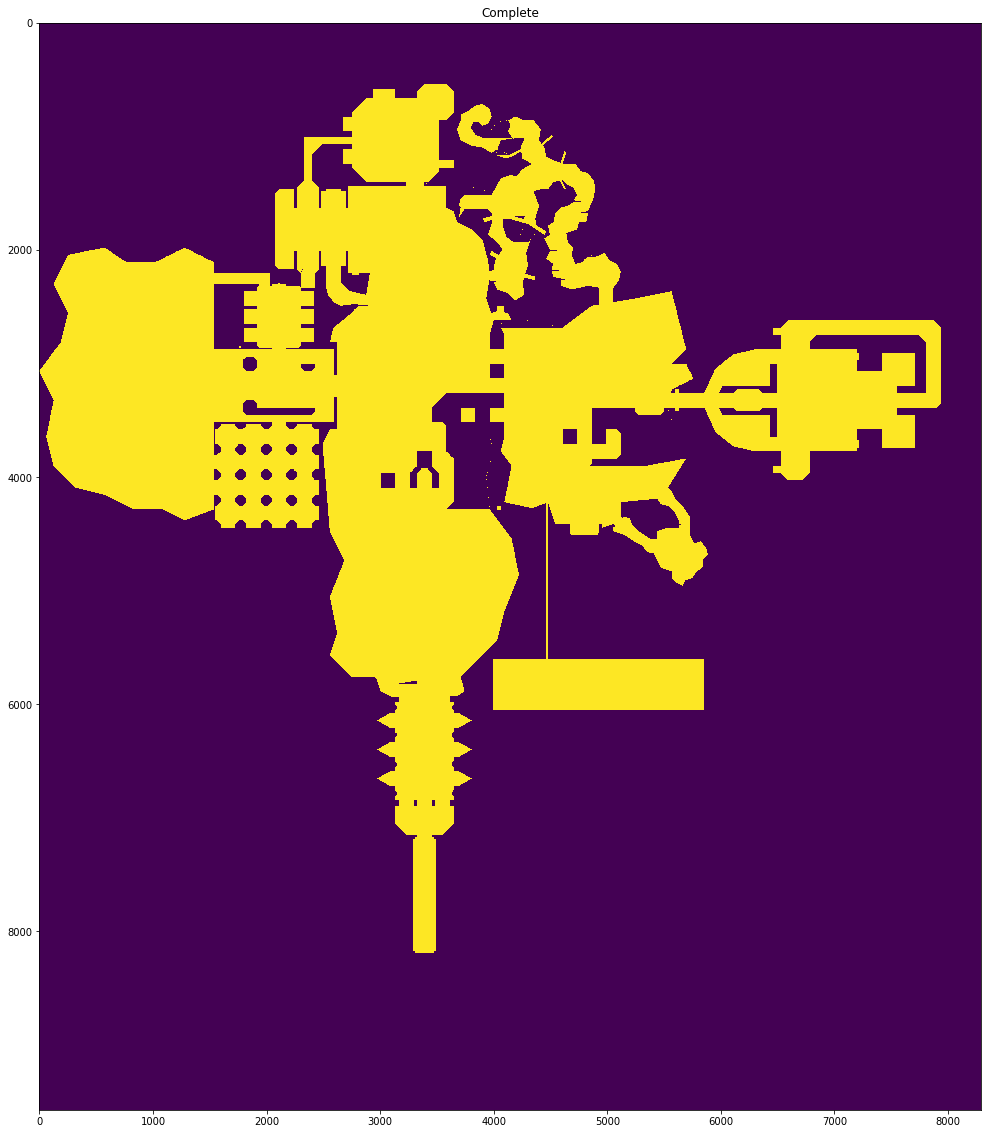

In [46]:
plt.figure(figsize=(20, 20))
full_image = get_image_array()
plt.imshow(full_image)
plt.title("Complete")


In [31]:
for x in list(cv2.__dict__.keys()):
    if 'AA' in x:
        print(x)

LINE_AA


2813